In [1]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'sis-water-level-change-indicators-cmip6',
    {
        'format': 'zip',
        'variable': [
            'annual_mean_of_highest_high_water', 'annual_mean_of_lowest_low_water', 'highest_astronomical_tide',
            'lowest_astronomical_tide', 'mean_sea_level', 'surge_level',
            'tidal_range', 'total_water_level',
        ],
        'derived_variable': 'absolute_value',
        'product_type': 'single_model',
        'model': 'hadgem3_gc31_hm_sst',
        'statistic': '100_year',
        'confidence_interval': 'best_fit',
        'experiment': 'historical',
        'period': [
            '1950', '1951', '1951-1980',
            '1952', '1953', '1954',
            '1955', '1956', '1957',
            '1958', '1959', '1985-2014',
        ],
    },
    'API_calls/CMIP6_50.zip')

2025-04-25 21:41:33,359 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-water-level-change-indicators-cmip6
2025-04-25 21:41:33,360 WARNING Connection error: [HTTPSConnectionPool(host='cds.climate.copernicus.eu', port=443): Max retries exceeded with url: /api/v2/resources/sis-water-level-change-indicators-cmip6 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x1185966f0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))]. Attempt 1 of 500.
2025-04-25 21:41:33,360 WARNING Retrying in 120 seconds
2025-04-25 21:43:33,366 INFO Retrying now...
2025-04-25 21:43:33,372 WARNING Connection error: [HTTPSConnectionPool(host='cds.climate.copernicus.eu', port=443): Max retries exceeded with url: /api/v2/resources/sis-water-level-change-indicators-cmip6 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x118596a20>: Failed to establish a new connection: [Errno 8] node

Exception: Not Found

In [24]:
import os
import xarray as xr
import matplotlib.pyplot as plt

# Define the directory containing the .nc files
directory = 'API_calls/CMIP6_50/'

# Get a list of all .nc files in the directory
nc_files = [file for file in os.listdir(directory) if file.endswith('.nc')]
nc_files

['historical_tide_actual-value_1958_LAT_v1.nc',
 'historical_tide_actual-value_1953_MSL_v1.nc',
 'historical_tide_actual-value_1955_LAT_v1.nc',
 'historical_tide_actual-value_1952_MHHW_v1.nc',
 'historical_tide_actual-value_1985-2014_TR_v1.nc',
 'historical_tide_actual-value_1956_HAT_v1.nc',
 'historical_tide_actual-value_1953_MLLW_v1.nc',
 'historical_tide_actual-value_1985-2014_LAT_v1.nc',
 'historical_tide_actual-value_1957_MHHW_v1.nc',
 'historical_tide_actual-value_1956_MLLW_v1.nc',
 'HadGEM3-GC31-HM-SST_historical_waterlevel_actual-value_1951-1980_rp100_best-fit_v1.nc',
 'historical_tide_actual-value_1958_MSL_v1.nc',
 'historical_tide_actual-value_1985-2014_MSL_v1.nc',
 'historical_tide_actual-value_1955_TR_v1.nc',
 'historical_tide_actual-value_1954_TR_v1.nc',
 'historical_tide_actual-value_1953_LAT_v1.nc',
 'historical_tide_actual-value_1955_MSL_v1.nc',
 'historical_tide_actual-value_1950_HAT_v1.nc',
 'historical_tide_actual-value_1958_TR_v1.nc',
 'historical_tide_actual-value_

1953


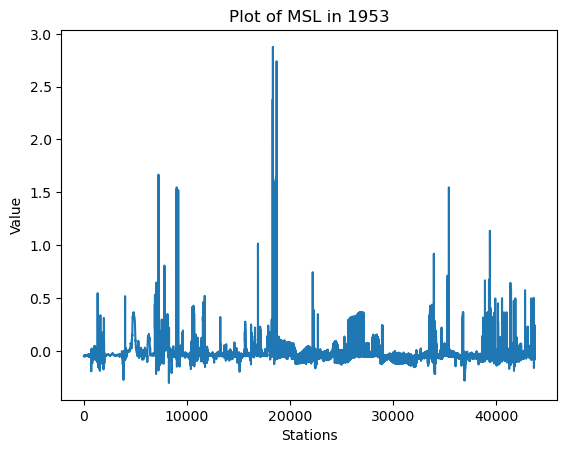

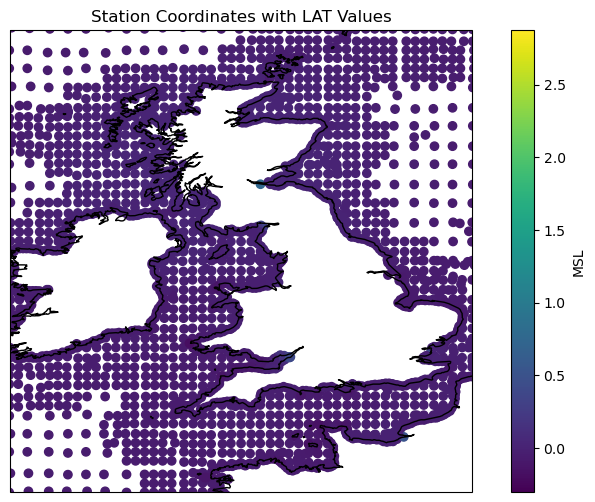

In [33]:
# Load the first .nc file
file_path = os.path.join(directory, nc_files[1])
data = xr.open_dataset(file_path)

# Plot one of the variables
variable_name = 'MSL'
data[variable_name].plot()

# Extract the year
year = np.datetime_as_string(data.time[0].values, unit='Y')
print(year)

# Add plot title and labels
plt.title('Plot of ' + variable_name + ' in ' + year)
plt.xlabel('Stations')
plt.ylabel('Value')


# Show the plot
plt.show()

import cartopy.crs as ccrs
# Plot the station coordinates as a map with LAT values as color
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot the station coordinates with color representing LAT values
sc = plt.scatter(data['station_x_coordinate'], data['station_y_coordinate'], transform=ccrs.PlateCarree(), c=data['MSL'], cmap='viridis', marker='o')

# Add colorbar
plt.colorbar(sc, label='MSL')

# Add plot title and labels
plt.title('Station Coordinates with LAT Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set extent to zoom in on the UK
ax.set_extent([-10, 2, 48, 60], crs=ccrs.PlateCarree())

# Show the plot
plt.show()

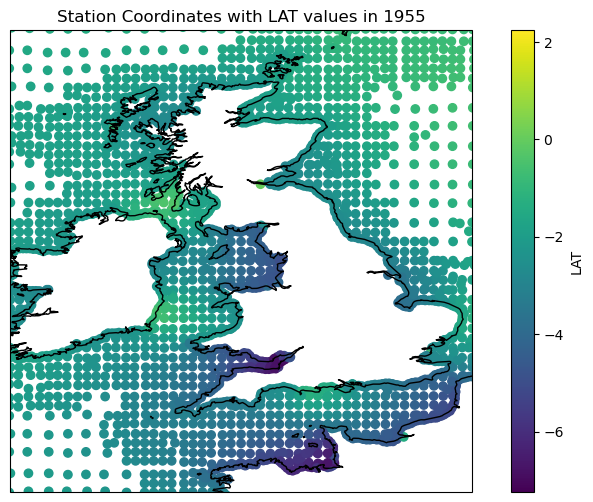

In [59]:
# Load the first .nc file
file_path = os.path.join(directory, nc_files[2])
data = xr.open_dataset(file_path)

# Plot one of the variables
variable_name = list(data.variables.keys())[0]

# Extract the year
year = np.datetime_as_string(data.time[0].values, unit='Y')

import cartopy.crs as ccrs
# Plot the station coordinates as a map with LAT values as color
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot the station coordinates with color representing LAT values
sc = plt.scatter(data['station_x_coordinate'], data['station_y_coordinate'], transform=ccrs.PlateCarree(), c=data[variable_name], cmap='viridis', marker='o')

# Add colorbar
plt.colorbar(sc, label=variable_name)

# Add plot title and labels
plt.title('Station Coordinates with ' + variable_name + ' values in ' + year)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set extent to zoom in on the UK
ax.set_extent([-10, 2, 48, 60], crs=ccrs.PlateCarree())

# Show the plot
plt.show()

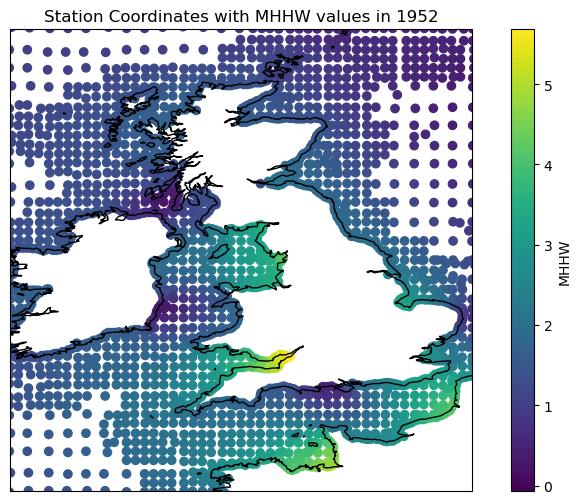

In [67]:
# Load the first .nc file
file_path = os.path.join(directory, nc_files[3])
data = xr.open_dataset(file_path)


# Assuming `data` is the frozen dictionary containing the xarray dataset variables
variable_names = list(data.variables.keys())

# List comprehension to select keys that are not in the specified list
variable_name= [var_name for var_name in variable_names if var_name not in ['station_x_coordinate', 'station_y_coordinate', 'stations', 'time']][0]

# Extract the year
year = np.datetime_as_string(data.time[0].values, unit='Y')

import cartopy.crs as ccrs
# Plot the station coordinates as a map with LAT values as color
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot the station coordinates with color representing LAT values
sc = plt.scatter(data['station_x_coordinate'], data['station_y_coordinate'], transform=ccrs.PlateCarree(), c=data[variable_name], cmap='viridis', marker='o')

# Add colorbar
plt.colorbar(sc, label=variable_name)

# Add plot title and labels
plt.title('Station Coordinates with ' + variable_name + ' values in ' + year)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set extent to zoom in on the UK
ax.set_extent([-10, 2, 48, 60], crs=ccrs.PlateCarree())

# Show the plot
plt.show()

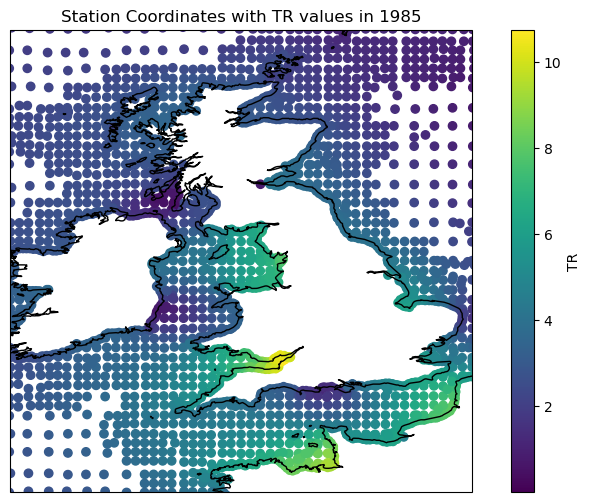

In [68]:
# Load the first .nc file
file_path = os.path.join(directory, nc_files[4])
data = xr.open_dataset(file_path)


# Assuming `data` is the frozen dictionary containing the xarray dataset variables
variable_names = list(data.variables.keys())

# List comprehension to select keys that are not in the specified list
variable_name= [var_name for var_name in variable_names if var_name not in ['station_x_coordinate', 'station_y_coordinate', 'stations', 'time']][0]

# Extract the year
year = np.datetime_as_string(data.time[0].values, unit='Y')

import cartopy.crs as ccrs
# Plot the station coordinates as a map with LAT values as color
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot the station coordinates with color representing LAT values
sc = plt.scatter(data['station_x_coordinate'], data['station_y_coordinate'], transform=ccrs.PlateCarree(), c=data[variable_name], cmap='viridis', marker='o')

# Add colorbar
plt.colorbar(sc, label=variable_name)

# Add plot title and labels
plt.title('Station Coordinates with ' + variable_name + ' values in ' + year)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set extent to zoom in on the UK
ax.set_extent([-10, 2, 48, 60], crs=ccrs.PlateCarree())

# Show the plot
plt.show()

## Only 1950

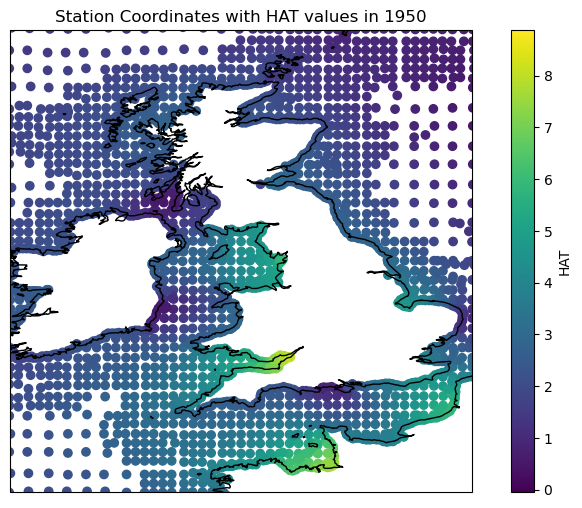

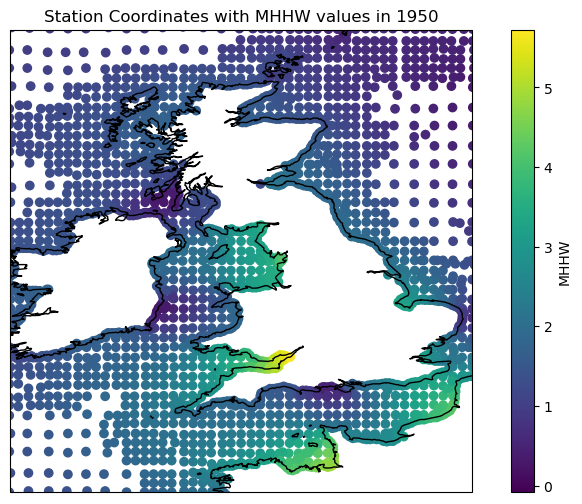

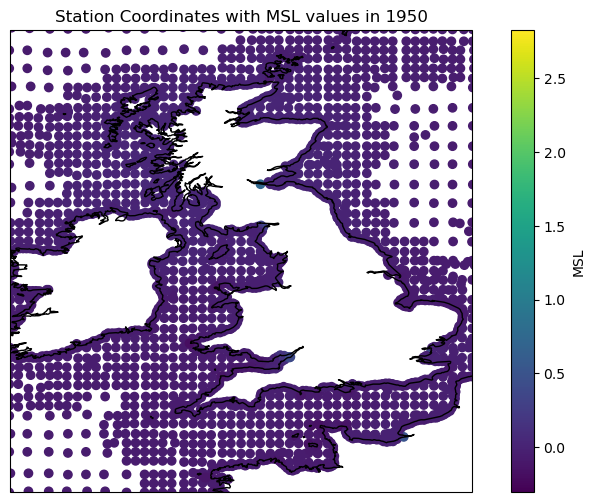

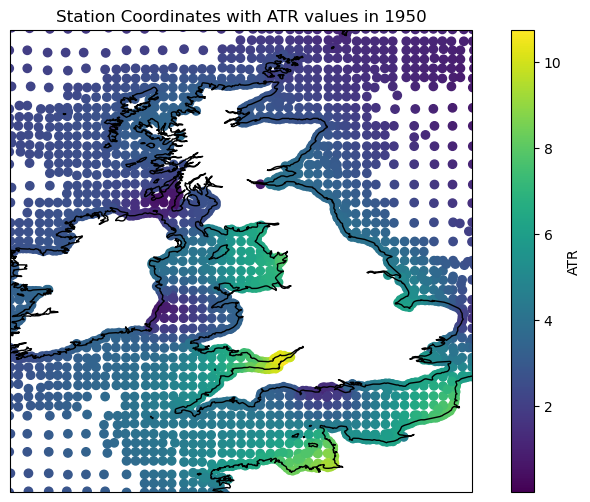

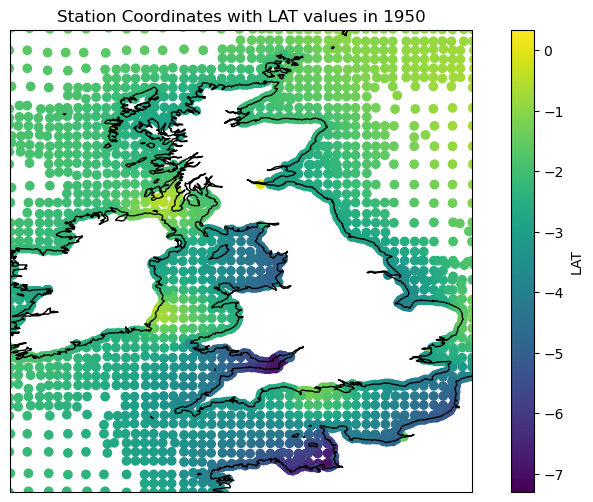

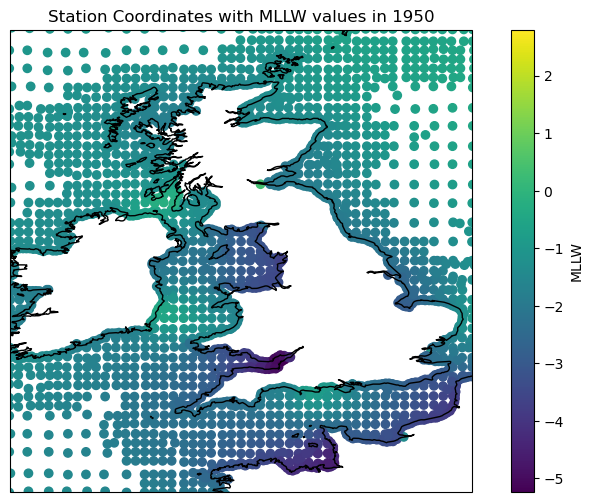

In [71]:
# Filter the list of files to only include those pertaining to the year 1950
nc_files_1950 = [file for file in nc_files if '1950' in file]


def plot_station_coordinates(file_path):
    # Open the NetCDF file
    data = xr.open_dataset(file_path)
    
    # Extract the variable name
    variable_names = list(data.variables.keys())
    variable_name = [var_name for var_name in variable_names if var_name not in ['station_x_coordinate', 'station_y_coordinate', 'stations', 'time']][0]
    
    # Extract the year
    year = np.datetime_as_string(data.time[0].values, unit='Y')
    
    # Plot the station coordinates as a map with LAT values as color
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Plot the station coordinates with color representing LAT values
    sc = plt.scatter(data['station_x_coordinate'], data['station_y_coordinate'], transform=ccrs.PlateCarree(), c=data[variable_name], cmap='viridis', marker='o')

    # Add colorbar
    plt.colorbar(sc, label=variable_name)

    # Add plot title and labels
    plt.title('Station Coordinates with ' + variable_name + ' values in ' + year)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Set extent to zoom in on the UK
    ax.set_extent([-10, 2, 48, 60], crs=ccrs.PlateCarree())

    # Show the plot
    plt.show()

for file in nc_files_1950:
    # Example usage
    file_path = os.path.join(directory, file)
    plot_station_coordinates(file_path)


In [83]:
nc_files_1950

['historical_tide_actual-value_1950_HAT_v1.nc',
 'historical_tide_actual-value_1950_MHHW_v1.nc',
 'historical_tide_actual-value_1950_MSL_v1.nc',
 'historical_tide_actual-value_1950_TR_v1.nc',
 'historical_tide_actual-value_1950_LAT_v1.nc',
 'historical_tide_actual-value_1950_MLLW_v1.nc']

In [119]:
# Open and concatenate all datasets
nc_files_1950 = [file for file in nc_files if '1950' in file]
datasets = [xr.open_dataset(os.path.join(directory, file)) for file in nc_files_1950]
combined_dataset = xr.concat(datasets, dim='file')

In [132]:
# Save the combined_dataset as a NetCDF file
combined_dataset.to_netcdf(os.path.join(directory, 'processed/1950_CMIP6.nc'))

In [120]:
# Loop through the years 1950 to 1959
combined_datasets_by_year = {}
for year in range(1950, 1960):
    # Filter files for the current year
    nc_files_year = [file for file in nc_files if str(year) in file]
    # Open and concatenate datasets for the current year
    datasets = [xr.open_dataset(os.path.join(directory, file)) for file in nc_files_year]
    combined_dataset_year = xr.concat(datasets, dim='file')
    # Store the combined dataset for the current year
    combined_datasets_by_year[year] = combined_dataset_year

In [128]:
# Define the variables to include
variables_to_include = ['HAT', 'MHHW', 'MSL', 'ATR', 'LAT', 'MLLW']

# Loop through the years 1950 to 1959
combined_datasets_by_year = {}
for year in range(1950, 1960):
    # Filter files for the current year
    nc_files_year = [file for file in nc_files if str(year) in file]
    # Open and concatenate datasets for the current year, including only variables that exist
    datasets = []
    for file in nc_files_year:
        dataset = xr.open_dataset(os.path.join(directory, file))
        selected_vars = [var for var in variables_to_include if var in dataset.variables]
        if selected_vars:
            datasets.append(dataset[selected_vars])
    # Concatenate datasets along the 'file' dimension
    combined_dataset_year = xr.concat(datasets, dim='file')
    # Store the combined dataset for the current year
    combined_datasets_by_year[year] = combined_dataset_year

# Concatenate the datasets for each year along the time dimension
combined_datasets_all_years = xr.concat(list(combined_datasets_by_year.values()), dim='time')

ValueError: cannot reindex or align along dimension 'file' because of conflicting dimension sizes: {11, 6}

In [118]:
import os
import xarray as xr

# Define the directory containing the .nc files
directory = 'API_calls/CMIP6_50/'

# Get a list of all .nc files in the directory
nc_files = [file for file in os.listdir(directory) if file.endswith('.nc')]

# Filter the list of files to only include those pertaining to the years 1950 to 1959
nc_files_1950_to_1959 = [file for file in nc_files if any(str(year) in file for year in range(1950, 1960))]

# Define the variables to include
variables_to_include = ['HAT', 'MHHW', 'MSL', 'ATR', 'LAT', 'MLLW']

# Open and concatenate selected variables for each year separately
datasets_by_year = []
for year in range(1950, 1960):
    # Filter files for the current year
    nc_files_year = [file for file in nc_files_1950_to_1959 if str(year) in file]
    # Open datasets for the current year and select specified variables
    datasets_year = [xr.open_dataset(os.path.join(directory, file))[variables_to_include] for file in nc_files_year]
    # Concatenate datasets along the 'variable' dimension
    combined_dataset_year = xr.concat(datasets_year, dim='time')
    # Add the concatenated dataset for the current year to the list
    datasets_by_year.append(combined_dataset_year)

# Concatenate all yearly datasets into one huge dataset
combined_dataset = xr.concat(datasets_by_year, dim='time')

KeyError: 'MHHW'

## return periods

In [80]:
def plot_station_coordinates_return(file_path):
    # Open the NetCDF file
    data = xr.open_dataset(file_path)
    
    # Extract the variable name
    variable_names = list(data.variables.keys())
    variable_name = [var_name for var_name in variable_names if var_name not in ['station_x_coordinate', 'station_y_coordinate', 'stations', 'time']][0]
    
    # Plot the station coordinates as a map with LAT values as color
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Plot the station coordinates with color representing LAT values
    sc = plt.scatter(data['station_x_coordinate'], data['station_y_coordinate'], transform=ccrs.PlateCarree(), c=data[variable_name], cmap='viridis', marker='o')

    # Add colorbar
    plt.colorbar(sc, label=variable_name)

    # Add plot title and labels
    plt.title('Station Coordinates with ' + variable_name + ' values')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Set extent to zoom in on the UK
    ax.set_extent([-10, 2, 48, 60], crs=ccrs.PlateCarree())

    # Show the plot
    plt.show()

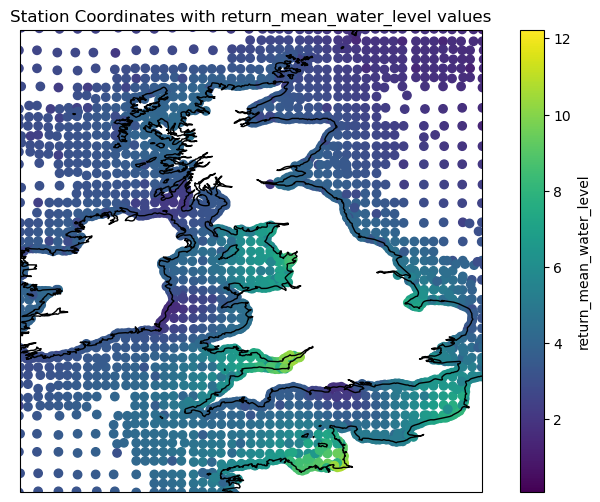

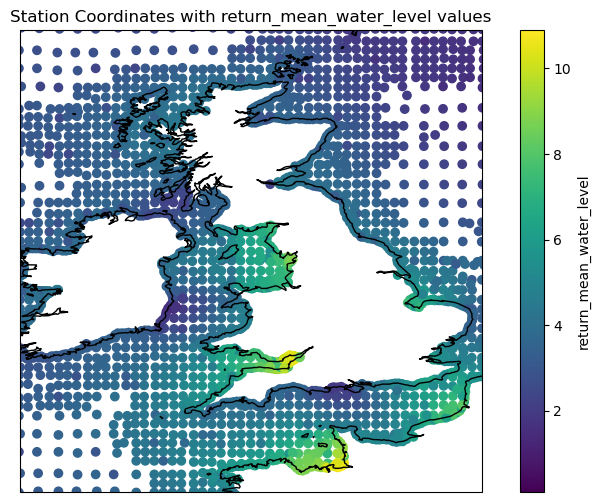

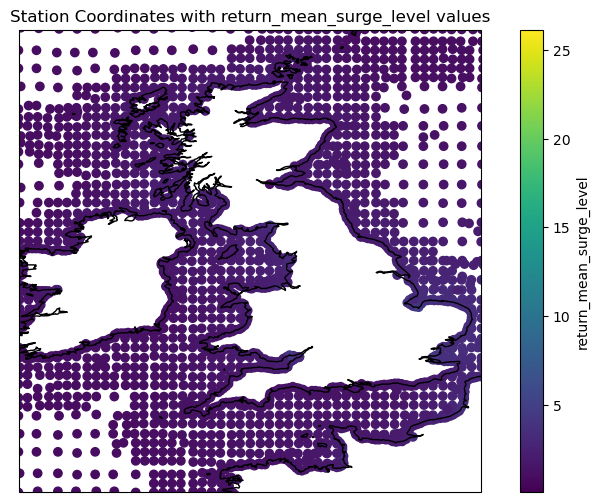

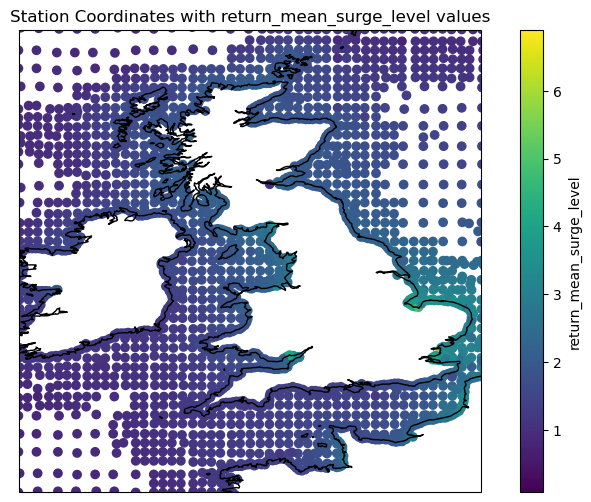

In [81]:
# Filter the list of files to only include those pertaining to the year 1950
nc_files_100return = [file for file in nc_files if 'HadGEM3-GC31-HM-SST' in file]

for file in nc_files_100return:
    # Example usage
    file_path = os.path.join(directory, file)
    plot_station_coordinates_return(file_path)